In [1]:
import os
import sys
import shutil
import importlib
import pandas as pd
import numpy as np
import amici
import jdata as jd
import argparse
from typing import Optional
import libsbml
import amici.plotting
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats

# os.chdir('/home/jonah/Desktop/SPARCED/unit_tests/Fig3BCD/scripts/')
os.chdir('/home/jonah/Desktop/SPARCED/unit_tests/Fig4A/results/')
__file__ = 'Fig4A_DevSpace.ipynb'
# Get the directory path
wd = os.path.dirname(os.path.abspath(__file__))

# Ensure the SPARCED root and bin directories are in the system path
sparced_root = '/'.join(wd.split(os.path.sep)[:wd.split(os.path.sep).index('SPARCED')+1])
sys.path.append(os.path.join(sparced_root, 'bin'))
from modules.RunSPARCED import RunSPARCED

sys.path.append(os.path.join(sparced_root, 'unit_tests/src'))

from sparced_erm import SPARCED_ERM
from petab_file_loader import PEtabFileLoader

In [4]:
data = jd.load('Fig4A.json')

In [3]:
# data['cell 0']['E_0_INS_0_k316_3_24']['xoutS'].shape
data['cell 0']['E_0_INS_0_k316_3_24']['toutS'].max()/3600


72.00833333333334

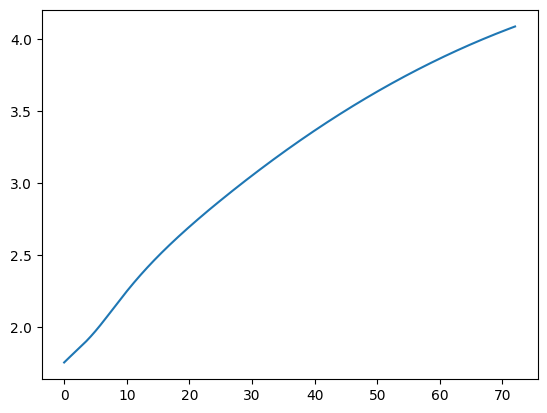

In [36]:
plt.plot(data['cell 0']['E_0_INS_0_k316_3_24']['toutS']/3600, data['cell 0']['E_0_INS_0_k316_3_24']['xoutS'][:, 105])

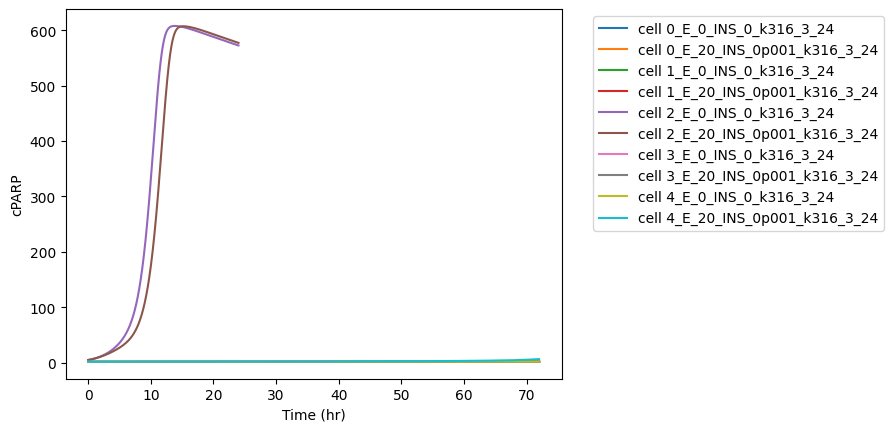

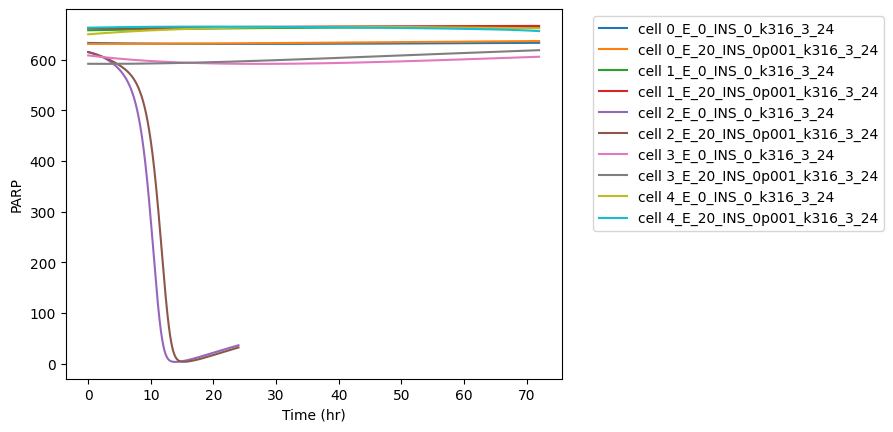

In [3]:
for cell in data:
    for stim in data[cell]:
        perished_cells = np.argwhere(data[cell][stim]['xoutS'][:, 105]>100.0)

        plt.plot(data[cell][stim]['toutS']/3600, data[cell][stim]['xoutS'][:, 105], label=cell  + '_' + stim)

# Display the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.xlabel('Time (hr)')
plt.ylabel('cPARP')  # Replace with your actual Y-axis label
plt.title('')  # Replace with your actual plot title
plt.show()

for cell in data:
    for stim in data[cell]:
        perished_cells = np.argwhere(data[cell][stim]['xoutS'][:, 105]>100.0)
        
        plt.plot(data[cell][stim]['toutS']/3600, data[cell][stim]['xoutS'][:, 103], label=cell  + '_' + stim)

# Display the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.xlabel('Time (hr)')
plt.ylabel('PARP')  # Replace with your actual Y-axis label
plt.title('')  # Replace with your actual plot title
plt.show()

In [ ]:
sbml_file, parameter_file, measurement_file, condition_file = PEtabFileLoader.load_petab_files('../petab_files/Fig4A.yml')

In [60]:
num_cells = len(data)
def death_rate(data):
    for cell in data:
        for stim in data[cell]:
            perished_cells = np.argwhere(data[cell][stim]['xoutS'][:, 105]>100.0)
            death_time = perished_cells[0]
    sbml_file, parameter_file, condition_file, measurement_file, observable_file = PEtabFileLoader.load_petab_files('../petab_files/Fig4A.yml')
    recorded_timepoints = measurement_file['time'].unique()
    conditions = measurement_file['simulationConditionId'].unique()
    experimental_measurements = measurement_file['measurement']
    for condition in conditions:
        condition = measurement_file[measurement_file['simulationConditionId']==condition]['measurement']
        measurement_file.reset_index(drop=True)
        experimental_timepoints = measurement_file['time'].unique()
        serum_starved = experimental_timepoints[:1]
        growth_factors = experimental_timepoints[2:len(experimental_timepoints)]
        # time = measurement_file[measurement_file['simulationConditionId'] == condition]['time']
        # experimental_timepoints = measurement_file['time'].unique()
        # conditional_timepoints = experimental_timepoints[condition.index]
        # plt.bar(experimental_timepoints, condition, width=0.1)
        # print(serum_starved)
        print(growth_factors)


death_rate(data)

[259200]
[259200]


In [2]:
data2 = jd.load('rand_test.json')

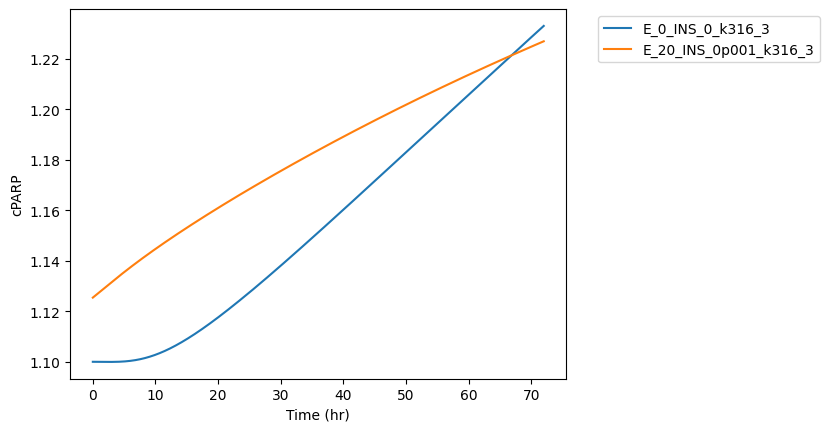

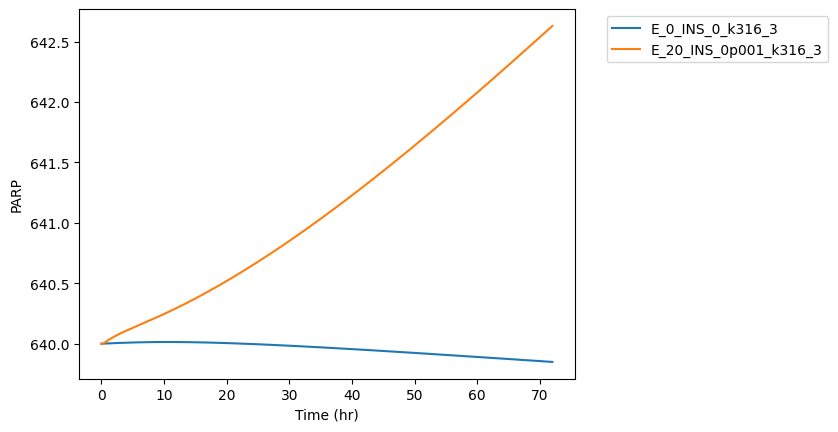

In [3]:

for stim in data2:
        # perished_cells = np.argwhere(data[cell][stim]['xoutS'][:, 105]>100.0)

    plt.plot(data2[stim]['toutS']/3600, data2[stim]['xoutS'][:, 105], label= stim)
    

# Display the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.xlabel('Time (hr)')
plt.ylabel('cPARP')  # Replace with your actual Y-axis label
plt.title('')  # Replace with your actual plot title
plt.show()

for stim in data2:
        # perished_cells = np.argwhere(data[cell][stim]['xoutS'][:, 105]>100.0)

    plt.plot(data2[stim]['toutS']/3600, data2[stim]['xoutS'][:, 103], label = stim)

# Display the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.xlabel('Time (hr)')
plt.ylabel('PARP')  # Replace with your actual Y-axis label
plt.title('')  # Replace with your actual plot title
plt.show()

In [9]:
# s, p, c, m, o = PEtabFileLoader.load_petab_files('Fig3BCD.yml')
# zeroTimeData = {
#     'observableId': ['ppAKT_total','ppAKT_total','ppAKT_total',\
#                      'ppAKT_total','ppAKT_total','ppAKT_total',\
#                      'ppAKT_total','ppAKT_total','ppAKT_total',\
#                      'ppAKT_total','ppAKT_total',\
#                      'ppAKT_total','ppAKT_total','ppAKT_total'],
#     'simulationConditionId': ['EGF_0p01_0p0', 'EGF_0p1_0p0', 'EGF_01_0p0', 'EGF_010_0p0',
#        'INS_0p17_0p0', 'INS_1p7_0p0', 'INS_17p0', 'INS_1721p0',
#        'EGF_INS_0p01_0p17_0p0', 'EGF_INS_0p01_1721p0',
#        'EGF_INS_010_0p17_0p0', 'EGF_INS_010_1721p0',
#        '00serum starved_0p0', '0LSM-4256 Neg Control_10p0'],
#     'measurement': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, \
#                     1.0, 1.0, 1.0, 1.0, 1.0],
#     'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
#     'noiseParameters': [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# }

# zeroTimeData = pd.DataFrame(zeroTimeData)
# m = pd.DataFrame(m)
# result_df = pd.concat([zeroTimeData, m.iloc[:]])

# # Reset the index to ensure it's continuous
# result_df.reset_index(drop=True, inplace=True)

# # Print the result
# result_df.to_csv('measurements.tsv', sep='\t', index=False)
# result_df

,observableId,simulationConditionId,measurement,time,noiseParameters
0,ppAKT_total,EGF_0p01_0p0,1.000000,0.0,1
1,ppAKT_total,EGF_0p1_0p0,1.000000,0.0,1
2,ppAKT_total,EGF_01_0p0,1.000000,0.0,1
3,ppAKT_total,EGF_010_0p0,1.000000,0.0,1
4,ppAKT_total,INS_0p17_0p0,1.000000,0.0,1
...,...,...,...,...,...
65,ppAKT_total,EGF_INS_0p01_1721p0,2.583547,21600.0,1
66,ppAKT_total,EGF_INS_010_0p17_0p0,2.808935,21600.0,1
67,ppAKT_total,EGF_INS_010_1721p0,9.031552,21600.0,1
68,ppAKT_total,00serum starved_0p0,1.000000,21600.0,1


In [20]:

def preincubate(yaml_file, preincubation_time: int):
    """Simulate the preincubation step."""
    th = int(preincubation_time)
    ts = 30
    # Load the PEtab files
    sbml_file, parameters_df, conditions_df, measurement_df, observable_df = PEtabFileLoader.load_petab_files(yaml_file)

    # Load the SBML model
    model_name = os.path.basename(sbml_file).split('.')[0]
    sys.path.insert(0, os.path.join(os.getcwd(), model_name))

    # Here, we import the model's internal packages as a python module
    model_module = importlib.import_module(model_name)
    model = model_module.getModel()

    solver = model.getSolver()
    solver.setMaxSteps = 1e10

    model.setTimepoints(np.linspace(0,ts)) # np.linspace(0, 30) # set timepoints

    # Serum starve the cell by setting the initial conditions of species to 0.0
    species_initializations = np.array(model_module.getModel().getInitialStates())
    species_initializations[np.argwhere(species_initializations <= 1e-6)] = 0.0 

    # Run SPARCED for preincubation time (th) with stimulus concentrations set to 0
    xoutS_all, xoutG_all, tout_all = RunSPARCED(0, th,species_initializations,[],sbml_file,model)

    # Store the preincubation results in a dictionary
    return xoutS_all, tout_all

In [3]:
# preinc_need = {}
# for i in range(5):
#     preinc_need[i] = preincubate('../petab_files/Fig3BCD.yml', 48)

In [6]:
# import jdata as jd
# jd.save(preinc_need, 'preinc_need.json')

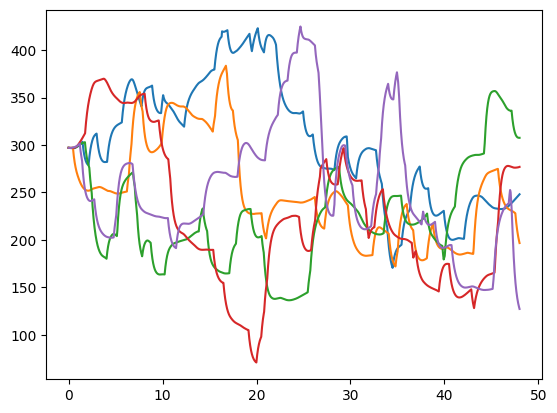

In [20]:
# for i in preinc_need: 
#     label = f'cell {i}'
#     plt.plot(preinc_need[i][1]/3600, preinc_need[i][0][:,1], label=i)

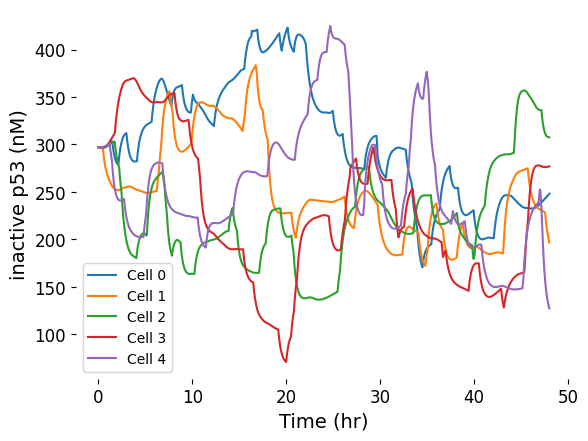

In [29]:
# import matplotlib.pyplot as plt

# # Assuming preinc_need is a dictionary with cell indices as keys and values as arrays

# # Create a figure and axis
# fig, ax = plt.subplots()

# # Plot each cell data
# for i in preinc_need:
#     label = f'Cell {i}'
#     ax.plot(preinc_need[i][1] / 3600, preinc_need[i][0][:, 1], label=label)

# # Customize the plot
# ax.set_xlabel('Time (hr)', fontsize=14)
# ax.set_ylabel('inactive p53 (nM)', fontsize=14)
# # ax.set_title('Ribosomes vs Time for Different Cells', fontsize=16)

# # Increase tick label font size
# ax.tick_params(axis='both', which='both', labelsize=12)
# plt.box(False)
# # Add a legend
# ax.legend()

# # Show the plot
# plt.show()
